In [2]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# Generate some example data
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers
classifier1 = LogisticRegression()
classifier2 = RandomForestClassifier()

# Fit classifiers on training data
classifier1.fit(X_train, y_train)
classifier2.fit(X_train, y_train)

# Predict probabilities on test data
probs1 = classifier1.predict_proba(X_test)[:, 1]
probs2 = classifier2.predict_proba(X_test)[:, 1]

# Calculate AUC for classifier 1
auc1 = roc_auc_score(y_test, probs1)

# Calculate AUC for classifier 2
auc2 = roc_auc_score(y_test, probs2)

print("AUC for Classifier 1:", auc1)
print("AUC for Classifier 2:", auc2)


AUC for Classifier 1: 0.9216159179981912
AUC for Classifier 2: 0.9378454426690784


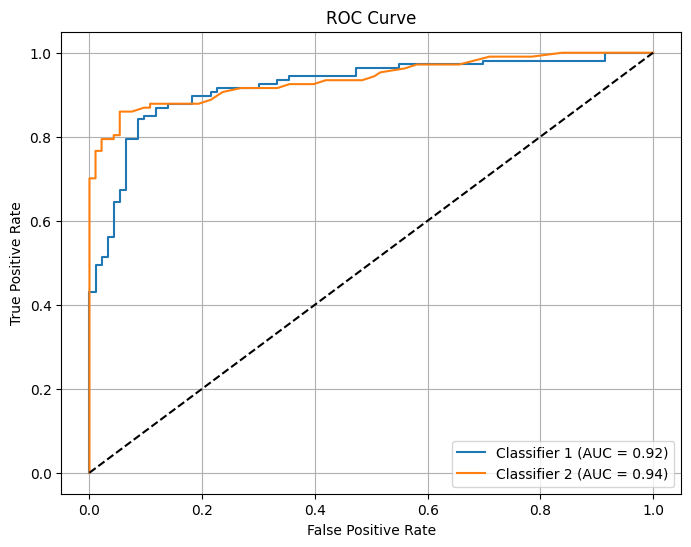

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Compute ROC curve for classifier 1
fpr1, tpr1, _ = roc_curve(y_test, probs1)

# Compute ROC curve for classifier 2
fpr2, tpr2, _ = roc_curve(y_test, probs2)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, label='Classifier 1 (AUC = {:.2f})'.format(auc1))
plt.plot(fpr2, tpr2, label='Classifier 2 (AUC = {:.2f})'.format(auc2))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


Classifier 2 is the best model with AUC: 0.9378454426690784